In [1]:
#Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

In [2]:
data = pd.read_csv('Advertising Budget and Sales.csv')
data.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.dtypes

Unnamed: 0                   int64
TV Ad Budget ($)           float64
Radio Ad Budget ($)        float64
Newspaper Ad Budget ($)    float64
Sales ($)                  float64
dtype: object

Le dataset contient cinq colonnes dont les types sont pour la plupart des variables quantitatifs continues

In [4]:
data.isnull().sum()

Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

Aucune valeurs nulle dans le dataset

In [5]:
data.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
data.shape

(200, 4)

Le dataset contient 200 lignes

In [9]:
data.nunique()

TV Ad Budget ($)           190
Radio Ad Budget ($)        167
Newspaper Ad Budget ($)    172
Sales ($)                  121
dtype: int64

DATA VISUALISATION : Analyse univariée et bivariée

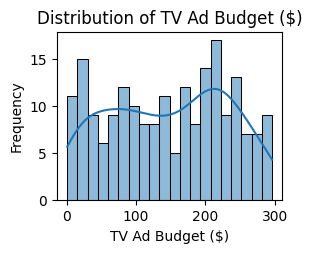

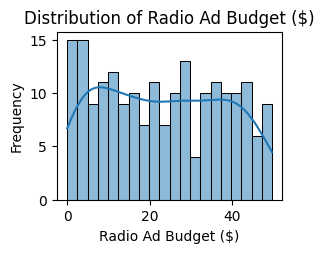

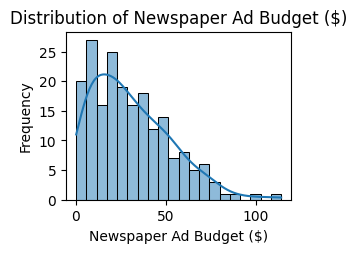

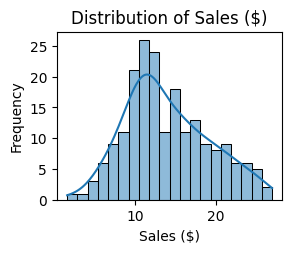

In [10]:
features = ['TV Ad Budget ($)','Radio Ad Budget ($)','Newspaper Ad Budget ($)','Sales ($)']
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Frequency')
    plt.show()

La variable Sales suit une loi normale,Newspapaer une loi de Khi-deux et les deux autres variables une loi normale

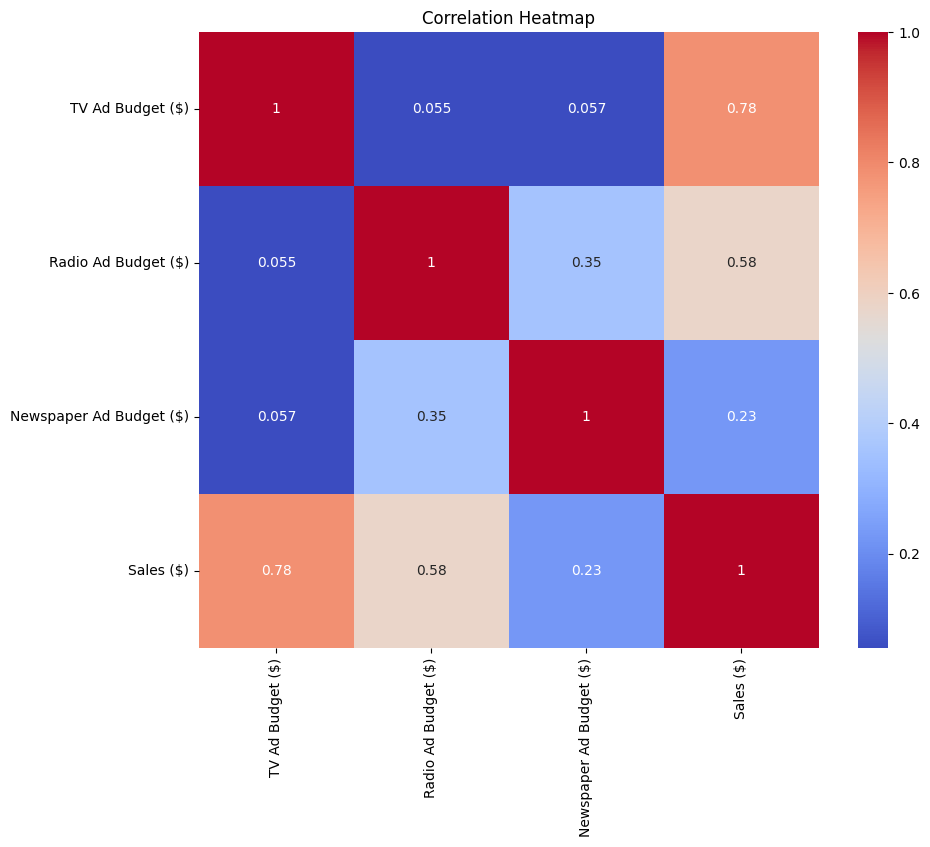

In [11]:
#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

A travers ce heatmap, on conclut que la variable Salles et TV Ad Budget sont fortement correlées 

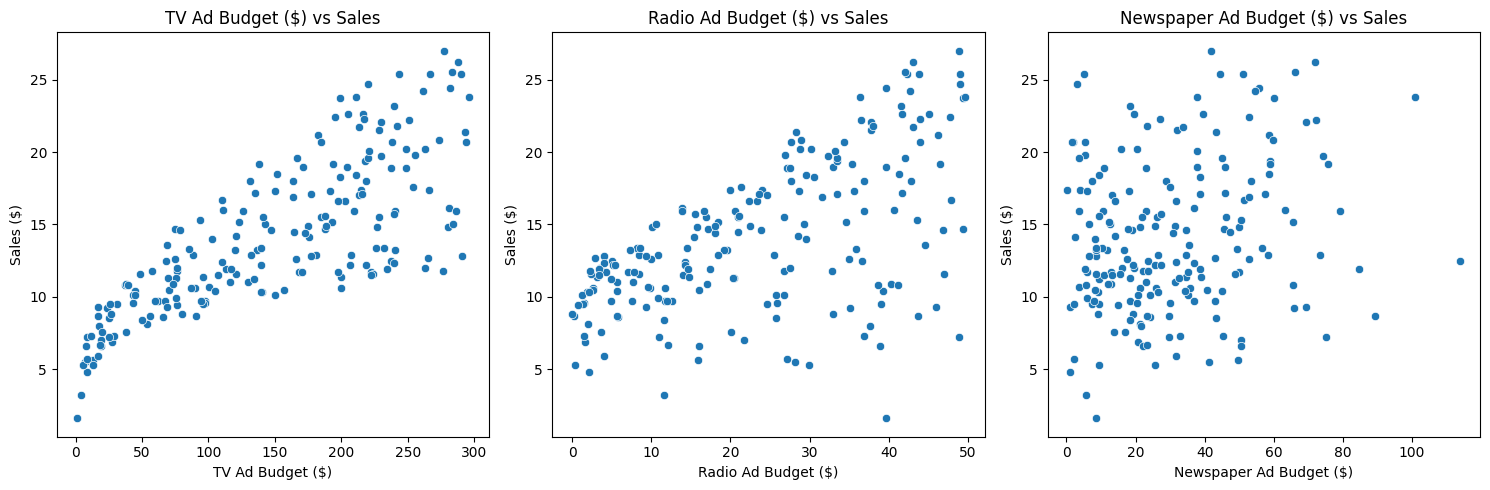

In [12]:
# List of features to compare with Sales
advertising_features = ['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']

plt.figure(figsize=(15, 5))

# Loop through features to create scatter plots
for i, feature in enumerate(advertising_features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=feature, y='Sales ($)', data=data)
    plt.title(f'{feature} vs Sales')

plt.savefig("Features Vs Sales")
plt.tight_layout()
plt.show()

Cette figure vient renforcer notre conclusion précédente sur la correlation Sales et Tv Ad Budget

Préparation des données pour l'entraînement

In [13]:
X = data.drop('Sales ($)', axis=1)
y = data['Sales ($)']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Nous standardisons obtenir une uniformité au sein des données

In [16]:
 #Initialize the scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training data and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)

In [18]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [19]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGBoost': XGBRegressor()
}


In [20]:
results = {}

for name, model in models.items():
    # Entraîne le modèle
    model.fit(X_train_scaled, y_train)

    # Prédire sur les données de test
    predictions = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Stockage des résultats
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }
    print(f"{name} - MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R2: {r2}")

# Afficher les résultats finaux
print("Résultats des modèles :", results)

Linear Regression - MSE: 3.1740973539761073, RMSE: 1.781599661533451, MAE: 1.4607567168117601, R2: 0.8994380241009119
Random Forest - MSE: 0.560846749999998, RMSE: 0.7488970222934512, MAE: 0.6415499999999973, R2: 0.9822312137698199
AdaBoost - MSE: 1.131086993281394, RMSE: 1.0635257370094031, MAE: 0.8694579742990729, R2: 0.9641648222239778
Decision Tree - MSE: 2.1422499999999998, RMSE: 1.4636427159658876, MAE: 0.9824999999999999, R2: 0.9321290846356809
XGBoost - MSE: 0.8689325216764425, RMSE: 0.9321655012262804, MAE: 0.7258287668228147, R2: 0.9724704186551494
Résultats des modèles : {'Linear Regression': {'MSE': np.float64(3.1740973539761073), 'RMSE': np.float64(1.781599661533451), 'MAE': np.float64(1.4607567168117601), 'R2': 0.8994380241009119}, 'Random Forest': {'MSE': np.float64(0.560846749999998), 'RMSE': np.float64(0.7488970222934512), 'MAE': np.float64(0.6415499999999973), 'R2': 0.9822312137698199}, 'AdaBoost': {'MSE': np.float64(1.131086993281394), 'RMSE': np.float64(1.0635257370

Après entrainement de plusieurs modèles,le RandomForest possède le meilleur score avec un R2 = 0.98

Sérialisation du modèle et déploiement via une API en utilisant avec Flask

In [21]:
# Enregistrez le modèle Random Forest
joblib.dump(models['Random Forest'], 'random_forest_model.pkl')


['random_forest_model.pkl']